In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ignore Warning 
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [89]:
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [103]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [90]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [91]:
df['target'].unique()

array([0, 1], dtype=int64)

In [92]:
age = df['age'].unique()
np.sort(age)

array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77], dtype=int64)

In [93]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [94]:
# Get Target data 
y = df['target']

#Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['target'], axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [95]:
print(f'X : {X.shape}')

X : (1025, 13)


### Divide Data into Train and test

In [96]:
# 63.2% of training records will be picked to grow each tree (training data)
# 36.8% of training data will be used for error rate estimation (test data)
# note: random_state is used to select a seed for this project. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.368, random_state=15)

In [97]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (647, 13)
y_train : (647,)
X_test : (378, 13)
y_test : (378,)


## Build Basic Random Forest Model

In [98]:
# For the sake of following the lecture example, I will used the gini criterion, the number of features be equal to the 
# square root of features for when splitting the nodes and as mentioned in the lecture notes, I am using the number of 
# estimators to be equal to the number of rows of the data set. But if I ever want to make some changes, I can always 
# made as many changes as I desired. 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

rf_Model = RandomForestClassifier(oob_score=True, n_estimators=len(y), criterion='gini', max_features='sqrt')

In [99]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1025, oob_score=True)

### Check Accuracy - OOB Score

In [100]:
# The concluding result of the ensemble model is determined by counting a majority vote from all the DTs. This concept 
# is known as Bagging or Bootstrap Aggregation.

# Out of bag (OOB) score is a way of validating the Random forest model. The Out of Bag sample are not used in the trianing
# in the training data set. After the DTs models have been trained, this leftover row or the OOB sample will be given as 
# unseen data or test to each DT. The DTs will predict the outcome of Out of Bag samples (test data). And finally by a 
# majority vote is selected the prediction. Similarly, each of the OOB sample rows is passed through every DT that did not 
# contain the OOB sample row in its bootstrap training data and a majority prediction is noted for each row.And lastly, the 
# OOB score is computed as the number of correctly predicted rows from the out of bag sample.
# https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

# this is just an extra feature to check the accuracy of my model. 

rf_Model.oob_score_

0.98145285935085

In [144]:
# Put models in a dictionary
models = {"Gaussian Naive Bayes": GaussianNB(),
          "Multinomial Naive Bayes": MultinomialNB(),
          "Random Forest": RandomForestClassifier(n_estimators=len(y), criterion='gini', max_features='sqrt')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(16)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
        y_pred = model.predict(X_test)
        print(name, ": Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
    return (model_scores)

In [145]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Gaussian Naive Bayes : Number of mislabeled points out of a total 378 points : 62
Multinomial Naive Bayes : Number of mislabeled points out of a total 378 points : 96
Random Forest : Number of mislabeled points out of a total 378 points : 16


{'Gaussian Naive Bayes': 0.8359788359788359,
 'Multinomial Naive Bayes': 0.746031746031746,
 'Random Forest': 0.9576719576719577}

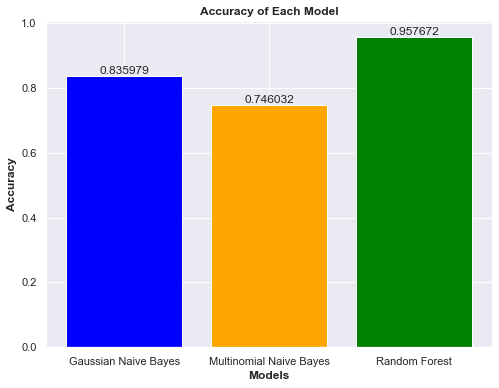

In [175]:
plt.subplots(figsize =(8, 6))

modelos = list(model_scores.keys())
accuracy = list(model_scores.values())

plt.bar(range(len(model_scores)), accuracy, tick_label=modelos, color=['blue', 'orange', 'green'])

ax = plt.gca()
plt.bar_label(ax.containers[0])

plt.title('Accuracy of Each Model', fontweight ='bold')

plt.xlabel('Models', fontweight ='bold', fontsize = 12)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 12)

plt.show()